In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('D:\\DataDrivenMKT\\Data Driven Marketing Course\\Data\\Chapter 2\\bank-additional\\bank-additional-full.csv',\
                 delimiter=';')

In [2]:
df['conversion'] = df['y']\
.apply(lambda x: 1 if x=='yes' else 0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

merge yes ->unknown; then use label encoder for this column

In [5]:
df['default'] = df['default'].apply(lambda x: 'unknown' if x=='yes' else x)

In [6]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

change:  basic.9y, basic.4y, basic.6y -> basic. Option: unknown -> university.degree

In [7]:
list_age = df[df['job']=='unknown']['age'].value_counts().index
list_age

Int64Index([45, 55, 53, 44, 35, 41, 32, 34, 38, 50, 49, 52, 47, 43, 56, 46, 60,
            58, 30, 59, 57, 42, 48, 27, 28, 24, 64, 26, 36, 37, 61, 33, 31, 25,
            81, 40, 51, 66, 54, 63, 78, 76, 65, 29, 69, 72, 62, 67],
           dtype='int64')

In [8]:
df[df['age']==45]['job'].value_counts().idxmax()

'blue-collar'

In [9]:
for age in list_age:
    df.loc[((df['age']==age)&(df['job']=='unknown'))\
           ,['job']] = df[df['age']==age]['job'].value_counts().idxmax()

In [10]:
df['job'].value_counts()

admin.           10547
blue-collar       9409
technician        6743
services          3969
management        2924
retired           1764
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            881
Name: job, dtype: int64

In [11]:
df.drop('y',axis=1,inplace=True)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'conversion'],
      dtype='object')

# Encoding categorical variables

In [12]:
###encoding months
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
'nov', 'dec']
df['month'] = df['month'].apply(
lambda x: months.index(x)+1
)

In [13]:
###encoding day of week 
days = ['mon','tue','wed','thu','fri']
df['day_of_week'] = df['day_of_week'].apply(
lambda x: days.index(x)+1
)

In [14]:
####encoding jobs
jobs_encoded_df = pd.get_dummies(df['job'],prefix='job')
df = pd.concat([df, jobs_encoded_df], axis=1)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,...,0,0,1,0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,telephone,5,1,...,0,0,0,0,0,0,1,0,0,0
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,0,0,0,0,0,0,1,0,0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,...,0,0,0,0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,0,0,0,0,0,0,1,0,0,0


In [15]:
###enconding marital
marital_encoded_df = pd.get_dummies(df['marital'],prefix='marital')
df = pd.concat([df, marital_encoded_df], axis=1)

In [16]:
###enconding poutcome
poutcome_encoded_df = pd.get_dummies(df['poutcome'],prefix='poutcome')
df = pd.concat([df, poutcome_encoded_df], axis=1)

In [17]:
###enconding contact
contact_encoded_df = pd.get_dummies(df['contact'],prefix='contact')
df = pd.concat([df, contact_encoded_df], axis=1)

In [18]:
###encoding education, basic.4y, 6y -> basic
df['education'] = df['education'].str.replace('basic.\w+','basic',regex=True)
categories = pd.Categorical(df['education'],\
                           categories = ['unknown','illiterate','basic',\
                                         'high.school','university.degree','professional.course'])
df['education'] = categories.codes

In [19]:
###encoding loan, default, housing
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)
df['default'] = df['loan'].apply(lambda x: 0 if x == 'no' else 1)

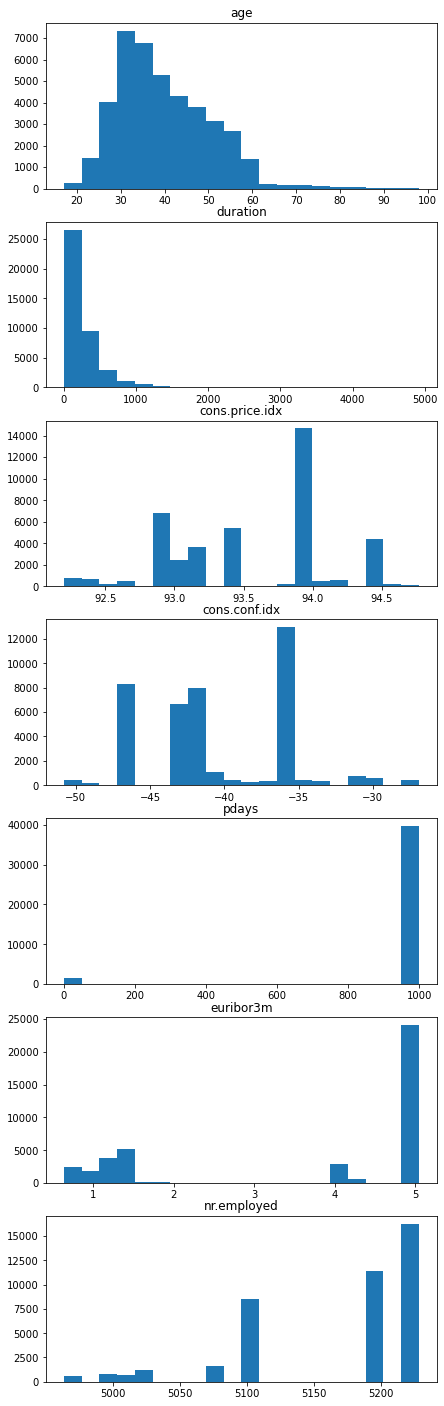

In [25]:
fig,ax = plt.subplots(7,1,figsize=[7,25])
i=0
for col in ['age','duration','cons.price.idx','cons.conf.idx','pdays', 'euribor3m', 'nr.employed']:
    ax[i].hist(df[col],bins=20)
    ax[i].set_title(col)
    i+=1

In [24]:
df['pdays'].value_counts(normalize=True)

999    0.963217
3      0.010658
6      0.010003
4      0.002865
9      0.001554
2      0.001481
7      0.001457
12     0.001408
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
22     0.000073
19     0.000073
21     0.000049
25     0.000024
26     0.000024
27     0.000024
20     0.000024
Name: pdays, dtype: float64

drop 'pdays' column
duration: right skew -> need log transform, MinMaxScaler: 'cons.price.idx', 'cons.conf.idx', 'age'

In [29]:
from sklearn.preprocessing import MinMaxScaler
df['duration'] = df['duration'].apply(lambda x: np.log(x+0.0001))
for col in ['age','duration','cons.price.idx','cons.conf.idx','nr.employed']:
    df[col] = MinMaxScaler().fit_transform(df[[col]])

In [30]:
data_final = df.drop(['job','marital','poutcome','contact'],axis=1)
data_final.columns

Index(['age', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'conversion', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'contact_cellular', 'contact_telephone'],
      dtype='object')

In [31]:
# data_final_vars=data_final.columns.values.tolist()
# y=['conversion']
# X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe = RFE(estimator = LogisticRegression(), n_features_to_select = 15)
rfe = rfe.fit(data_final.drop('conversion',axis=1), data_final['conversion'])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[False False  True False False False False  True False False  True  True
  True False False False  True False False False  True False False  True
 False False  True  True  True False  True  True False  True  True]
[18 16  1 19 17 14 21  1 20 15  1  1  1 13  2 12  1  4  6 10  1 11  3  1
  8  7  1  1  1  9  1  1  5  1  1]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
print(rfe.support_)

[False False  True False False False False  True False False  True  True
  True False False False  True False False False  True False False  True
 False False  True  True  True False  True  True False  True  True]


In [33]:
[i for i in range(len(rfe.support_)) if rfe.support_[i]==True]

[2, 7, 10, 11, 12, 16, 20, 23, 26, 27, 28, 30, 31, 33, 34]

In [34]:
selected_features = data_final.drop('conversion',axis=1)\
.columns[[i for i in range(len(rfe.support_)) if rfe.support_[i]==True]]

In [35]:
selected_features

Index(['default', 'duration', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'job_blue-collar', 'job_retired', 'job_student',
       'marital_divorced', 'marital_married', 'marital_single',
       'poutcome_failure', 'poutcome_nonexistent', 'contact_cellular',
       'contact_telephone'],
      dtype='object')

In [36]:
from statsmodels.discrete.discrete_model import Logit
logit = Logit(data_final['conversion'],data_final[selected_features])
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.204290
         Iterations 8


In [37]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             conversion   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41174
Method:                           MLE   Df Model:                           13
Date:                Tue, 31 Jan 2023   Pseudo R-squ.:                  0.4197
Time:                        13:36:26   Log-Likelihood:                -8414.3
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
default                -23.4225   1.39e+06  -1.69e-05      1.000   -2.72e+06    2.72e+06
duration                37.5098      0.588     63.757      0.000      36.357      38.663
emp.var.rate            -0.9350      0.021    -44.101      0.000      -0.977      -0.893
cons.price.idx           3.4546      0.137     25.219      0.000       3.186       3.723
cons.conf.idx            1.6298      0.095     17.069      0.000       1.443       1.817
job_blue-collar         -0.3893      0.055     -7.079      0.000      -0.497      -0.281
job_retired              0.4147      0.082      5.080      0.000       0.255       0.575
job_student              0.2774      0.106      2.621      0.009       0.070       0.485
marital_divorced        -0.0685      0.388     -0.177      0.860      -0.828       0.691
marital_married         -0.0744      0.384     -0.194      0.846      -0.826       0.678
marital_single           0.0720      0.385      0.187      0.851      -0.682       0.826
poutcome_failure        -1.9429      0.089    -21.823      0.000      -2.117      -1.768
poutcome_nonexistent    -1.4374      0.079    -18.119      0.000      -1.593      -1.282
contact_cellular       -11.2378   1.39e+06  -8.09e-06      1.000   -2.72e+06    2.72e+06
contact_telephone      -12.1847   1.39e+06  -8.77e-06      1.000   -2.72e+06    2.72e+06
========================================================================================
"""

In [47]:
drop_feats = ['marital_divorced','marital_married','marital_single','contact_cellular','contact_telephone']

In [48]:
logit = Logit(data_final['conversion'],data_final[selected_features].drop(drop_feats,axis=1))
logit_fit = logit.fit()
logit_fit.summary()

Optimization terminated successfully.
         Current function value: 0.207622
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             conversion   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41178
Method:                           MLE   Df Model:                            9
Date:                Tue, 31 Jan 2023   Pseudo R-squ.:                  0.4102
Time:                        13:47:12   Log-Likelihood:                -8551.5
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
default                -34.0637      0.524    -65.068      0.000     -35.090     -33.038
duration                37.3303      0.584     63.961      0.000      36.186      38.474
emp.var.rate            -0.9630      0.022    -44.198      0.000      -1.006      -0.920
cons.price.idx           2.7439      0.129     21.265      0.000       2.491       2.997
cons.conf.idx            1.0772      0.088     12.272      0.000       0.905       1.249
job_blue-collar         -0.4860      0.054     -8.991      0.000      -0.592      -0.380
job_retired              0.4185      0.079      5.275      0.000       0.263       0.574
job_student              0.3781      0.101      3.744      0.000       0.180       0.576
poutcome_failure        -2.0292      0.088    -23.009      0.000      -2.202      -1.856
poutcome_nonexistent    -1.6162      0.078    -20.739      0.000      -1.769      -1.463
========================================================================================
"""

https://www.statsmodels.org/dev/generated/statsmodels.discrete.discrete_model.LogitResults.get_margeff.html#statsmodels.discrete.discrete_model.LogitResults.get_margeff

In [49]:
margeff = logit_fit.get_margeff(at='overall', method='eyex', atexog=None, dummy=False, count=False)

In [50]:
margeff.summary_frame()

,d(lny)/d(lnx),Std. Err.,z,Pr(>|z|),Conf. Int. Low,Cont. Int. Hi.
duration,26.665591,0.417168,63.920474,0.000000e+00,25.847956,27.483225
emp.var.rate,-0.212666,0.006191,-34.352727,1.282373e-258,-0.224799,-0.200532
cons.price.idx,1.331043,0.062101,21.433583,6.498152e-102,1.209328,1.452758
cons.conf.idx,0.408205,0.032971,12.380776,3.321153e-35,0.343584,0.472827
job_blue-collar,-0.103406,0.011720,-8.823130,1.113044e-18,-0.126377,-0.080436
job_retired,0.013392,0.002411,5.553713,2.796640e-08,0.008666,0.018119
job_student,0.005526,0.001385,3.989421,6.623476e-05,0.002811,0.008241
poutcome_failure,-0.179674,0.008400,-21.389181,1.684918e-101,-0.196138,-0.163210
poutcome_nonexistent,-1.272222,0.061870,-20.562835,5.907781e-94,-1.393485,-1.150959


USING DECISION TREE

In [51]:
df.shape

(41188, 40)

In [52]:
data_final.columns

Index(['age', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'conversion', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'contact_cellular', 'contact_telephone'],
      dtype='object')

In [53]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth=4)
tree_model.fit(data_final.drop('conversion',axis=1),data_final['conversion'])

DecisionTreeClassifier(max_depth=4)

In [54]:
import graphviz

In [55]:
from sklearn.tree import export_graphviz

In [56]:
features = data_final.drop('conversion',axis=1).columns

In [57]:
features

Index(['age', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week', 'duration', 'campaign', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'marital_unknown',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success',
       'contact_cellular', 'contact_telephone'],
      dtype='object')

In [67]:
dot_data = export_graphviz(tree_model,\
                          feature_names=features,\
                          class_names = ['0','1'],\
                          filled=True,\
                          rounded=True,\
                          special_characters=True)

graph = graphviz.Source(dot_data)

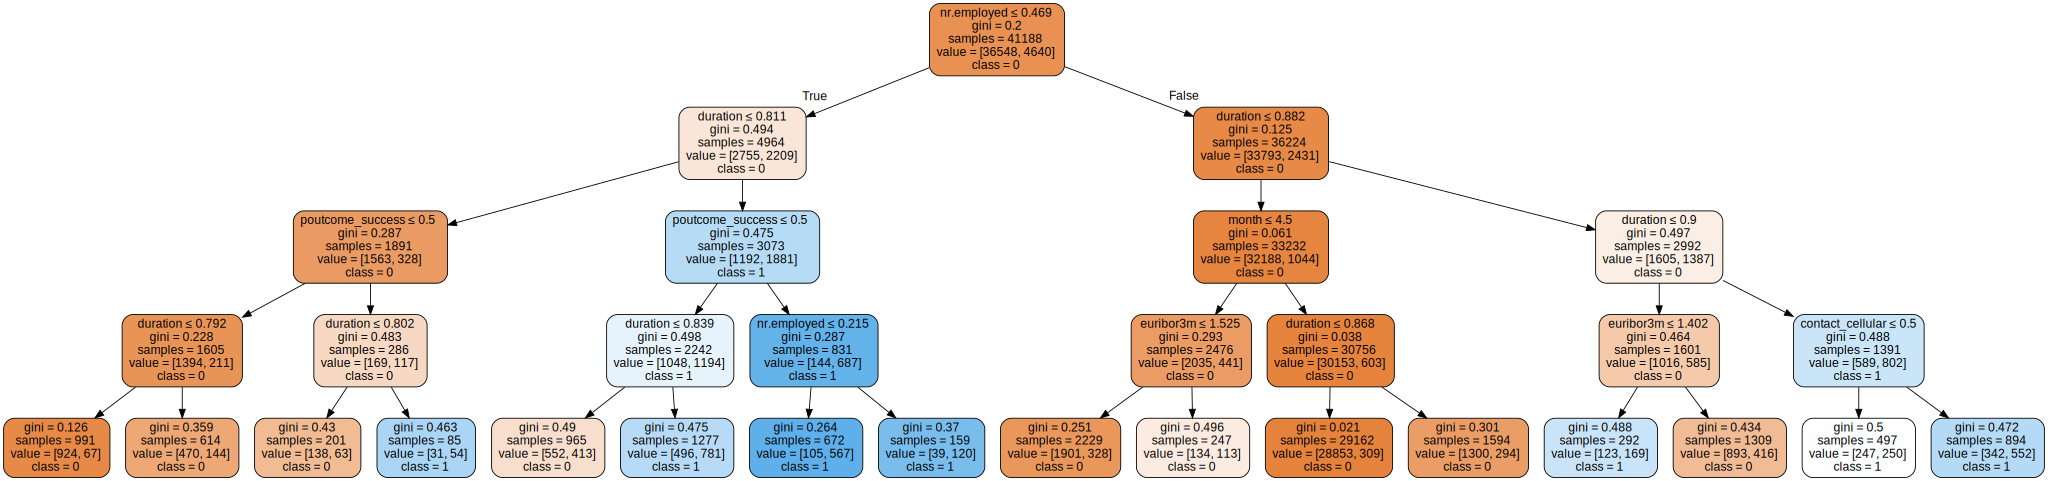

In [68]:
graph